In [30]:
import pandas as pd
data = pd.read_table("./data_for_plot.csv")
data = data[["Well Position","Cycle","Delta Rn"]]
grouped = data.groupby("Well Position")

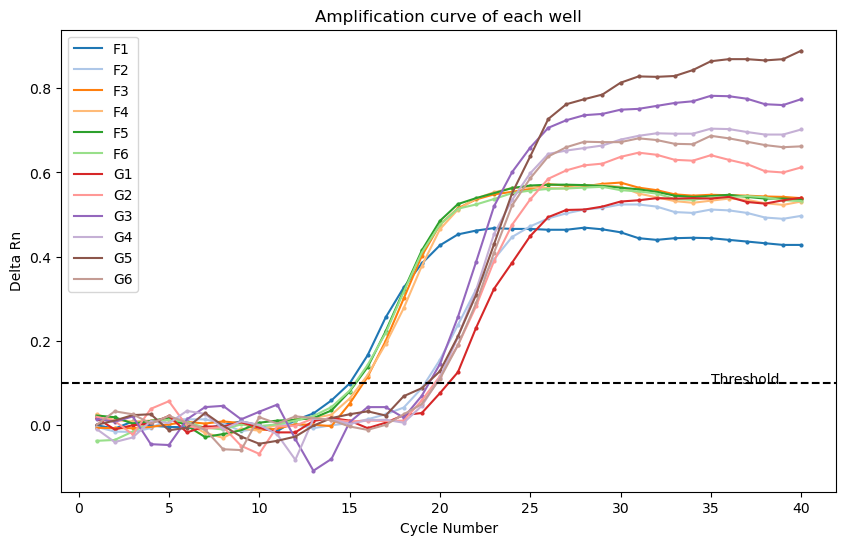

<Figure size 640x480 with 0 Axes>

In [46]:
import matplotlib.pyplot as plt
import matplotlib

# 创建图形和子图
fig, ax = plt.subplots(figsize=(10, 6))

# color_map = plt.cm.get_cmap('tab20', 12)
color_map = matplotlib.colormaps['tab20']


# 绘制折线并标注样本点
i = 0
for name,df in grouped:
    color = color_map(i)
    ax.plot(df["Cycle"], df["Delta Rn"], color=color,label=name)
    ax.scatter(df["Cycle"], df["Delta Rn"],color=color,s=4)
    i+=1

# 添加图例
ax.legend()

# 设置图形标题和坐标轴标签
ax.set_title('Amplification curve of each well')
ax.set_xlabel('Cycle Number')
ax.set_ylabel('Delta Rn')

# 添加threshold
threshold = 0.1
ax.axhline(threshold, color='black', linestyle='--', label='Threshold')
# ax.annotate('Threshold', xy=(40, threshold), xytext=(10.2, threshold),
#             color='r', arrowprops=dict(facecolor='r', arrowstyle='->'))
ax.text(35, threshold, 'Threshold', color='black')

# 显示图形
plt.show()
plt.savefig("./amplication_curve.png")